In [4]:
!pip install requests
!pip install tabulate
!pip install "colorama >= 0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
!pip install h2o-wave

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML


In [6]:
df = pd.read_csv("../data/DataCo_cleaned.csv")
#df = df.iloc[:, 1:32]
df.shape

(2000, 22)

In [7]:
# train test split
train, test = train_test_split(df, test_size=0.4, random_state=42)
test, validation = train_test_split(test, test_size=0.5, random_state=42)

# define the target variable
target = 'Order Item Quantity'
features = df.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target] 
X_validation = validation[features]
y_validation = validation[target]


In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,23 mins 34 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_TYS_gefzhk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.918 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [9]:
# transform df into a compatible data format
hf_dataset = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
train, test = hf_dataset.split_frame(ratios=[0.6],seed=1)
test, val = test.split_frame(ratios=[0.5],seed=1)

y = "Order Item Quantity"
X = hf_dataset.columns
X.remove(y)

In [12]:
h2o_aml = H2OAutoML(max_models = 12, seed = 1, exclude_algos = ["StackedEnsemble"], verbosity="info") #max_runtime_secs=120,

In [13]:
h2o_aml.train(x = X, y = y, training_frame = train)

AutoML progress: |█
15:40:26.452: Project: AutoML_1_20240423_154026
15:40:26.455: 5-fold cross-validation will be used.
15:40:26.455: Setting stopping tolerance adaptively based on the training frame: 0.028676966733820218
15:40:26.455: Build control seed: 1
15:40:26.457: training frame: Frame key: AutoML_1_20240423_154026_training_py_8_sid_8802    cols: 22    rows: 1216  chunks: 1    size: 208228  checksum: -140458100710306879
15:40:26.457: validation frame: NULL
15:40:26.457: leaderboard frame: NULL
15:40:26.457: blending frame: NULL
15:40:26.458: response column: Order Item Quantity
15:40:26.458: fold column: null
15:40:26.458: weights column: null
15:40:26.485: AutoML: XGBoost is not available; skipping it.
15:40:26.496: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240423_154026_model_1


Status of Neuron Layers: predicting Order Item Quantity, regression, gaussian distribution, Quadratic loss, 202,101 weights/biases, 2.4 MB, 608,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        2019     Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.21692728490206406    0.4095296859741211     0.0         -0.002249449034247183  0.03262448310852051  0.12507179435249177  0.09859955310821533
    3        1        Linear                       0.0   0.0   0.0046746377472300085  0.0019225161522626877  0.0         0.03765501283109188    0.26429545879364014  -0.2372555064821451  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.09287482252960876
RMSE: 0.30475370798336276
MAE: 0.21648543746168658
RMSLE: 0.06828011660654625
Mean Residual Deviance: 0.09287482252960876

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.14789759226240756
RMSE: 0.3845745600821869
MAE: 0.25642493147936124
RMSLE: 0.09756796427148562
Mean Residual Deviance: 0.14789759226240756

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0          nan           nan           nan           nan           nan
loglikelihood           nan        0          nan           nan           nan           nan           nan
mae                     0.256413   0.0303059  0.270874      0.239508      0.223438      0.301181      0.247064
mean_residual_deviance  0.147901   0.0367208  0.143517      0.129728      0.125358      0.212398      0.128506
mse                     0.147901   0.0367208  0.143517      0.129728      0.125358      0.212398      0.128506
r2                      0.950919   0.0121467  0.952278      0.957106      0.958634      0.929613      0.956966
residual_deviance       0.147901   0.0367208  0.143517      0.129728      0.125358      0.212398      0.128506
rmse                    0.382483   0.0448301  0.378836      0.360178      0.354059      0.460866      0.358477
rmsle                   0.0973993  0.006301   0.104301      0.0904447     0.0956013     0.103703      0.092946

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-04-23 15:45:18  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2024-04-23 15:45:19  4 min 23.758 sec  9318 obs/sec      10        1             12160      0.918618         0.843858             0.668148        0.719961
    2024-04-23 15:45:24  4 min 28.976 sec  11313 obs/sec     60        6             72960      0.394365         0.155524             0.28151         0.948389
    2024-04-23 15:45:30  4 min 34.656 sec  12114 obs/sec     120       12            145920     0.28225          0.0796653            0.1859          0.973563
    2024-04-23 15:45:36  4 min 40.247 sec  12468 obs/sec     180       18            218880     0.272046         0.0740088            0.154854  

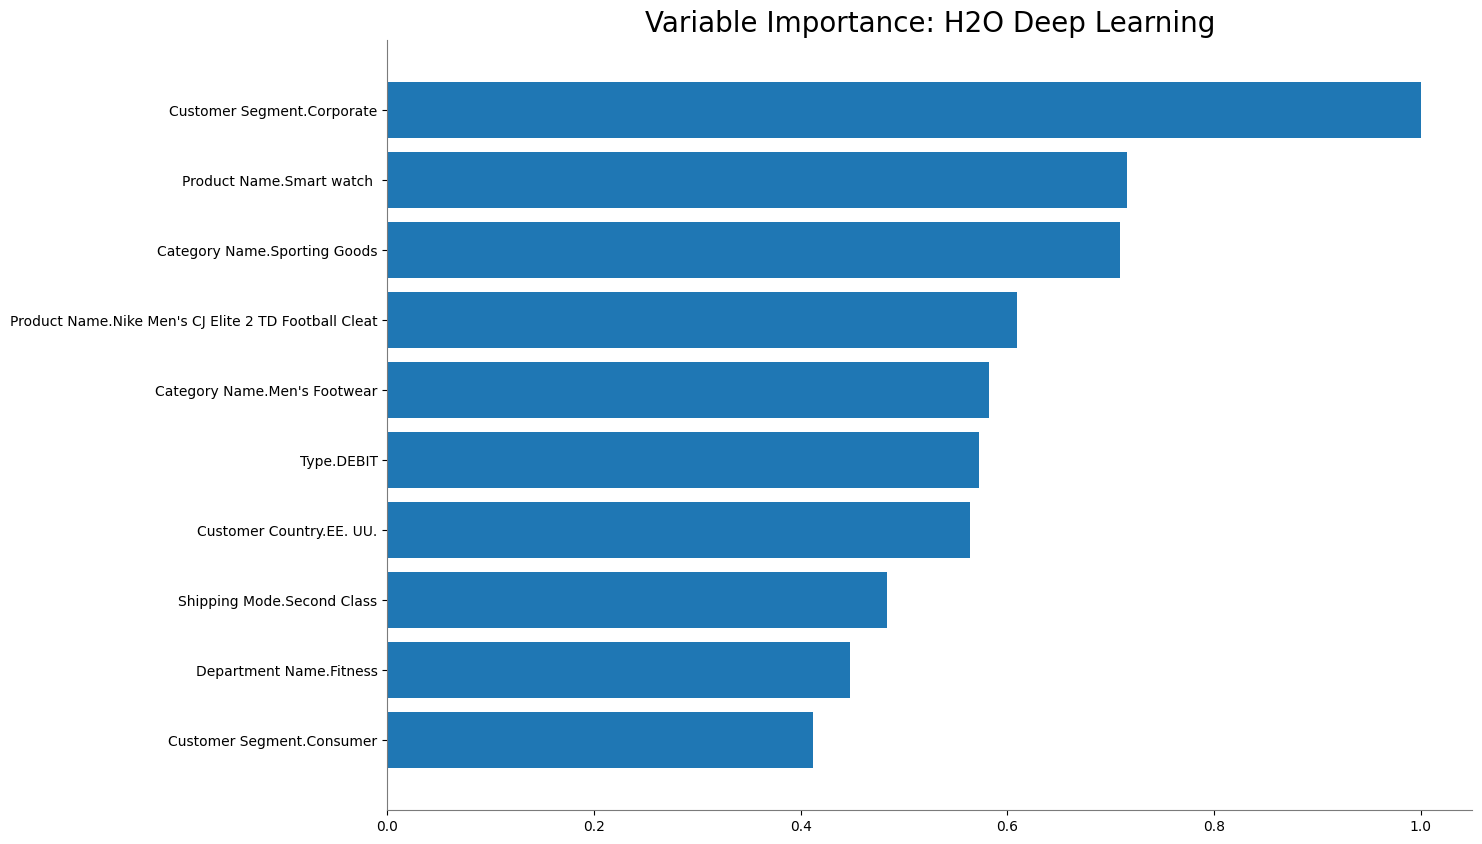

<Figure size 640x480 with 0 Axes>

In [14]:
# plot importances
h2o_aml.leader.varimp_plot()

In [15]:
se = h2o_aml.leader

h2o_lb = h2o_aml.leaderboard
h2o_lb.head(rows = h2o_lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
DeepLearning_grid_1_AutoML_1_20240423_154026_model_1,0.384575,0.147898,0.256425,0.097568,0.147898
DeepLearning_1_AutoML_1_20240423_154026,0.427362,0.182638,0.284557,0.124577,0.182638
GBM_5_AutoML_1_20240423_154026,0.687106,0.472115,0.408903,0.174497,0.472115
DRF_1_AutoML_1_20240423_154026,0.699748,0.489647,0.42302,0.198604,0.489647
GBM_3_AutoML_1_20240423_154026,0.723681,0.523715,0.430971,0.184721,0.523715
GLM_1_AutoML_1_20240423_154026,0.729037,0.531495,0.543078,0.240644,0.531495
GBM_grid_1_AutoML_1_20240423_154026_model_2,0.790204,0.624423,0.474587,0.202693,0.624423
GBM_4_AutoML_1_20240423_154026,0.821818,0.675385,0.495312,0.209952,0.675385
GBM_1_AutoML_1_20240423_154026,0.87107,0.758763,0.598332,0.231817,0.758763
GBM_grid_1_AutoML_1_20240423_154026_model_1,0.877095,0.769296,0.584497,0.214053,0.769296


In [16]:
se

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_1_AutoML_1_20240423_154026_model_1


Status of Neuron Layers: predicting Order Item Quantity, regression, gaussian distribution, Quadratic loss, 202,101 weights/biases, 2.4 MB, 608,000 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias            bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  -------------------  -----------------------
    1        2019     Input             15.0
    2        100      RectifierDropout  10.0       0.0   0.0   0.21692728490206406    0.4095296859741211     0.0         -0.002249449034247183  0.03262448310852051  0.12507179435249177  0.09859955310821533
    3        1        Linear                       0.0   0.0   0.0046746377472300085  0.0019225161522626877  0.0         0.03765501283109188    0.26429545879364014  -0.2372555064821451  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.09287482252960876
RMSE: 0.30475370798336276
MAE: 0.21648543746168658
RMSLE: 0.06828011660654625
Mean Residual Deviance: 0.09287482252960876

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.14789759226240756
RMSE: 0.3845745600821869
MAE: 0.25642493147936124
RMSLE: 0.09756796427148562
Mean Residual Deviance: 0.14789759226240756

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0          nan           nan           nan           nan           nan
loglikelihood           nan        0          nan           nan           nan           nan           nan
mae                     0.256413   0.0303059  0.270874      0.239508      0.223438      0.301181      0.247064
mean_residual_deviance  0.147901   0.0367208  0.143517      0.129728      0.125358      0.212398      0.128506
mse                     0.147901   0.0367208  0.143517      0.129728      0.125358      0.212398      0.128506
r2                      0.950919   0.0121467  0.952278      0.957106      0.958634      0.929613      0.956966
residual_deviance       0.147901   0.0367208  0.143517      0.129728      0.125358      0.212398      0.128506
rmse                    0.382483   0.0448301  0.378836      0.360178      0.354059      0.460866      0.358477
rmsle                   0.0973993  0.006301   0.104301      0.0904447     0.0956013     0.103703      0.092946

Scoring History: 
    timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-04-23 15:45:18  0.000 sec                           0         0             0          nan              nan                  nan             nan
    2024-04-23 15:45:19  4 min 23.758 sec  9318 obs/sec      10        1             12160      0.918618         0.843858             0.668148        0.719961
    2024-04-23 15:45:24  4 min 28.976 sec  11313 obs/sec     60        6             72960      0.394365         0.155524             0.28151         0.948389
    2024-04-23 15:45:30  4 min 34.656 sec  12114 obs/sec     120       12            145920     0.28225          0.0796653            0.1859          0.973563
    2024-04-23 15:45:36  4 min 40.247 sec  12468 obs/sec     180       18            218880     0.272046         0.0740088            0.154854  

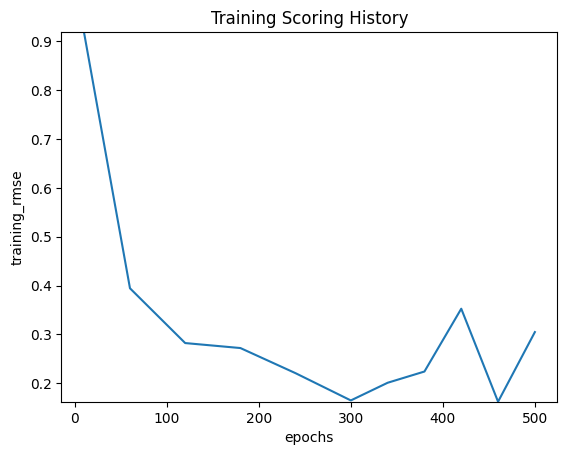

In [17]:
# plot scoring history trees and training_logloss
se.plot()